## keras使用例：2値分類

チューニング、CV等は省略

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

print(tf.__version__)

2.0.0-beta0


In [2]:
# sample dataset
num_samples = 4000
noise = 0.3

X, y = make_moons(n_samples=num_samples, noise=noise)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

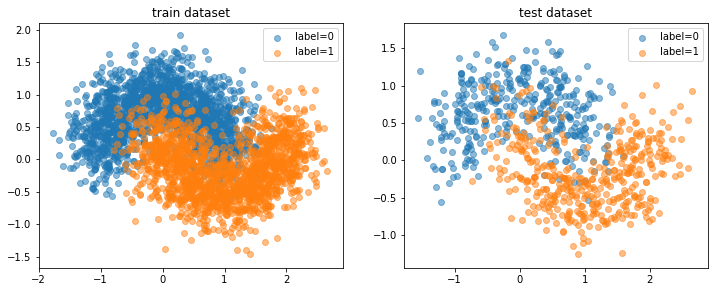

In [3]:
plt.figure(figsize=(12, 4.5))

plt.subplot(121)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], alpha=0.5, label="label=0")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], alpha=0.5, label="label=1")
plt.title("train dataset")
plt.legend()

plt.subplot(122)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], alpha=0.5, label="label=0")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], alpha=0.5, label="label=1")
plt.title("test dataset")
plt.legend();

In [4]:
# model
def build_nn_model():
    model = keras.Sequential([
        keras.layers.Dense(10, activation="relu", input_shape=(2,)),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])
    
    return model

In [5]:
model = build_nn_model()
optimizer = keras.optimizers.Adam()
model.compile(
    optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
    )

In [6]:
history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=30,
    verbose=1,
    validation_data=(X_test, y_test),
    shuffle=True
    )

W0719 18:31:07.131768 11676 deprecation.py:323] From C:\Users\Ryo\Anaconda3\envs\py36tf\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3200 samples, validate on 800 samples
Epoch 1/30
3200/3200 [==============================] - 1s 237us/sample - loss: 0.5520 - accuracy: 0.7444 - val_loss: 0.4232 - val_accuracy: 0.8338
Epoch 2/30
3200/3200 [==============================] - 0s 146us/sample - loss: 0.3781 - accuracy: 0.8328 - val_loss: 0.3471 - val_accuracy: 0.8550
Epoch 3/30
3200/3200 [==============================] - 0s 147us/sample - loss: 0.3416 - accuracy: 0.8478 - val_loss: 0.3337 - val_accuracy: 0.8612
Epoch 4/30
3200/3200 [==============================] - 0s 148us/sample - loss: 0.3323 - accuracy: 0.8575 - val_loss: 0.3280 - val_accuracy: 0.8625
Epoch 5/30
3200/3200 [==============================] - 1s 163us/sample - loss: 0.3271 - accuracy: 0.8591 - val_loss: 0.3223 - val_accuracy: 0.8650
Epoch 6/30
3200/3200 [==============================] - 0s 155us/sample - loss: 0.3231 - accuracy: 0.8600 - val_loss: 0.3191 - val_accuracy: 0.8675
Epoch 7/30
3200/3200 [==============================] - 0s 149us/

In [7]:
print("test loss & accuracy: ", model.evaluate(X_test, y_test))

800/800 [==============================] - 0s 85us/sample - loss: 0.2373 - accuracy: 0.9025
test loss & accuracy:  [0.23732020407915116, 0.9025]


In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

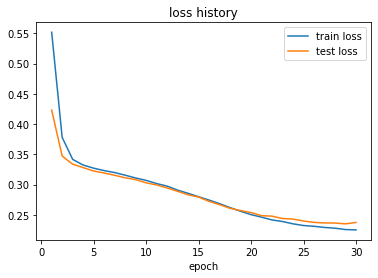

In [9]:
plt.plot(np.arange(1, 31), history.history["loss"], label="train loss")
plt.plot(np.arange(1, 31), history.history["val_loss"], label="test loss")
plt.xlabel("epoch")
plt.title("loss history")
plt.legend();

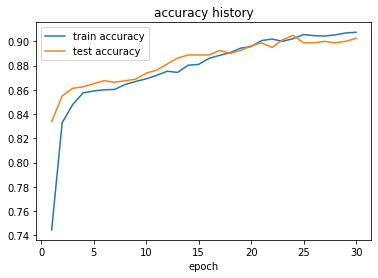

In [10]:
plt.plot(np.arange(1, 31), history.history["accuracy"], label="train accuracy")
plt.plot(np.arange(1, 31), history.history["val_accuracy"], label="test accuracy")
plt.xlabel("epoch")
plt.title("accuracy history")
plt.legend();

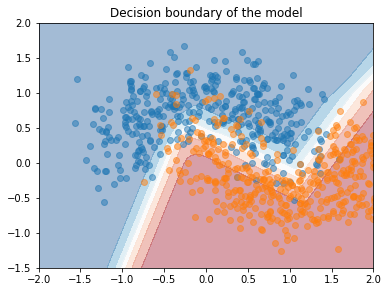

In [11]:
x0 = np.linspace(-2, 3, 200)
x1 = np.linspace(-1.5, 2, 200)

xx0, xx1 = np.meshgrid(x0, x1)

X_grid = np.vstack((xx0.ravel(), xx1.ravel())).T

z = model.predict(X_grid)

plt.figure(figsize=(6, 4.5))
plt.contourf(xx0, xx1, z.reshape((200, 200)), cmap=plt.cm.RdBu_r, alpha=0.4)
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], alpha=0.5)
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], alpha=0.5)
plt.xlim(-2, 2)
plt.ylim(-1.5, 2)
plt.grid(False)
plt.title("Decision boundary of the model");